# Economic Analysis with Pandas

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from fredapi import Fred

# Loading environment variables
import os
from dotenv import load_dotenv
load_dotenv()
fred_api_key = os.environ.get('FRED_API_KEY')

# Initial settings
plt.style.use('fivethirtyeight')      # Default plotting style
pd.set_option('display.max_columns', 500)     

color_palette = plt.rcParams['axes.prop_cycle'].by_key()['color']     # Pulls all colors from plot style

In [2]:
fred = Fred(api_key=fred_api_key)     # establish reusable fred object

### Sample Search Data (S&P)

In [3]:
fred.search('S&P')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
SP500,SP500,2023-08-13,2023-08-13,S&P 500,2013-08-12,2023-08-11,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-08-11 19:10:58-05:00,81,The observations for the S&P 500 represent the...
VXVCLS,VXVCLS,2023-08-13,2023-08-13,CBOE S&P 500 3-Month Volatility Index,2007-12-04,2023-08-10,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-08-11 08:36:10-05:00,52,"Copyright, 2016, Chicago Board Options Exchang..."
VXOCLS,VXOCLS,2023-08-13,2023-08-13,CBOE S&P 100 Volatility Index: VXO (DISCONTINUED),1986-01-02,2021-09-23,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2021-09-24 08:36:03-05:00,29,This series is no longer being updated by the ...
CSUSHPINSA,CSUSHPINSA,2023-08-13,2023-08-13,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-05-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-07-25 08:11:01-05:00,90,"For more information regarding the index, plea..."
CSUSHPISA,CSUSHPISA,2023-08-13,2023-08-13,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-05-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-07-25 08:11:03-05:00,79,"For more information regarding the index, plea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CRDQHKBPABIS,CRDQHKBPABIS,2023-08-13,2023-08-13,Credit to Private Non-Financial Sector by Dome...,1978-10-01,2022-10-01,"Quarterly, End of Quarter",Q,Billions of Hong Kong Dollars,Bil. of Hong Kong $,Not Seasonally Adjusted,NSA,2023-06-12 13:03:08-05:00,3,"Credit is provided by domestic banks, all othe..."
CSHRCPCNA156NRUG,CSHRCPCNA156NRUG,2023-08-13,2023-08-13,Share of Residual Trade and GDP Statistical Di...,1952-01-01,2019-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2021-11-08 13:35:26-06:00,3,Source ID: csh_r When using these data in you...
CSHRCPINA156NRUG,CSHRCPINA156NRUG,2023-08-13,2023-08-13,Share of Residual Trade and GDP Statistical Di...,1950-01-01,2019-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2021-11-08 13:35:23-06:00,3,Source ID: csh_r When using these data in you...


In [4]:
snp_search = fred.search('S&P', order_by='popularity')
snp_search.head()     # first 5 in descending order

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-08-13,2023-08-13,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-08-10,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-08-11 09:10:02-05:00,93,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-08-13,2023-08-13,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-05-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-07-25 08:11:01-05:00,90,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-08-13,2023-08-13,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-08-10,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-08-11 09:10:07-05:00,82,This data represents the effective yield of th...
SP500,SP500,2023-08-13,2023-08-13,S&P 500,2013-08-12,2023-08-11,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-08-11 19:10:58-05:00,81,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2023-08-13,2023-08-13,Real Median Household Income in the United States,1984-01-01,2021-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:01-05:00,80,Household data are collected as of March. As ...


## Pulling Raw Data and Plot

<Axes: title={'center': 'S&P 500'}>

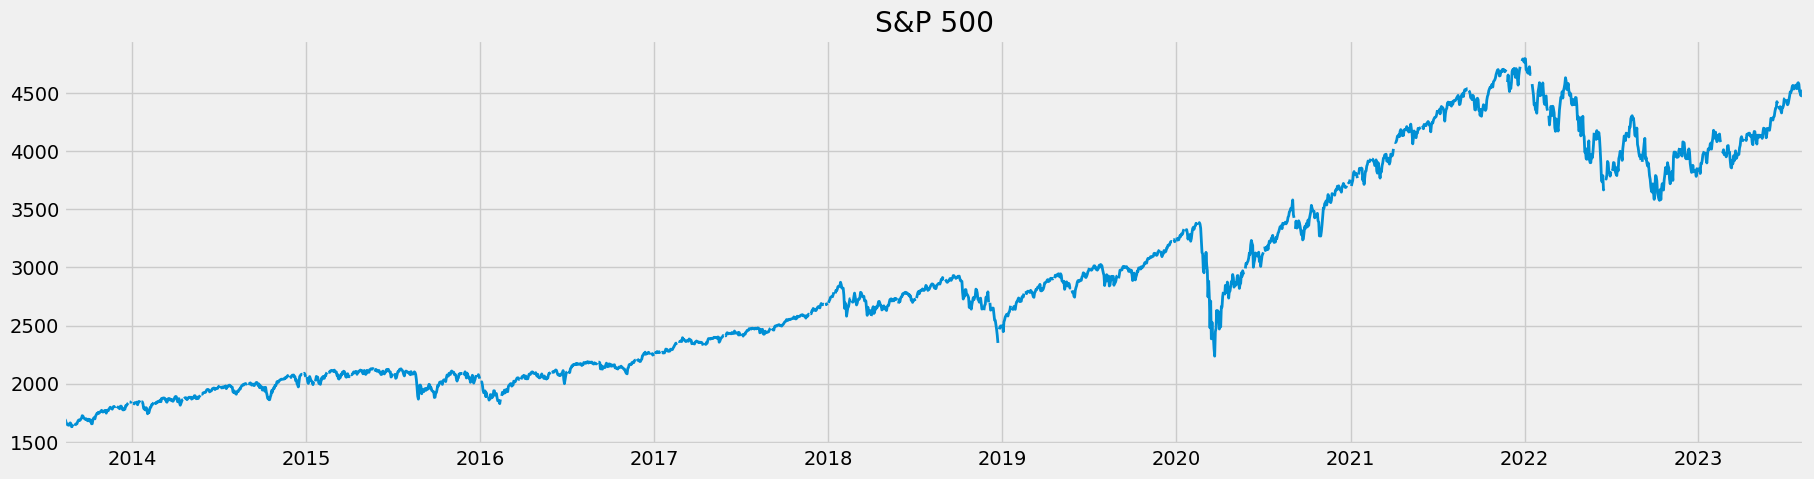

In [5]:
sp500 = fred.get_series(series_id = 'SP500')
sp500.plot(figsize=(20,5), title='S&P 500', lw=2)

<Axes: title={'center': 'NASDAQ Composite'}>

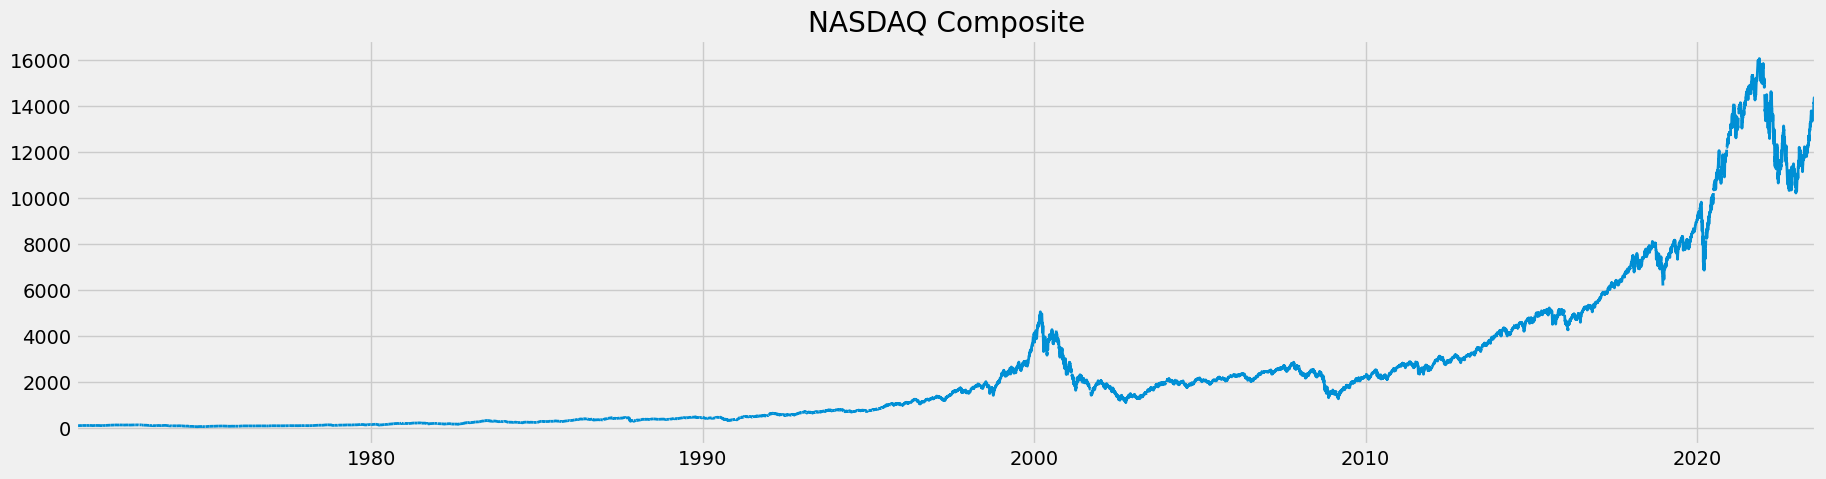

In [6]:
nasdaq = fred.get_series(series_id = 'NASDAQCOM')
nasdaq.plot(figsize=(20,5), title='NASDAQ Composite', lw=2)

<Axes: title={'center': 'Dow Jones Industrial Average'}>

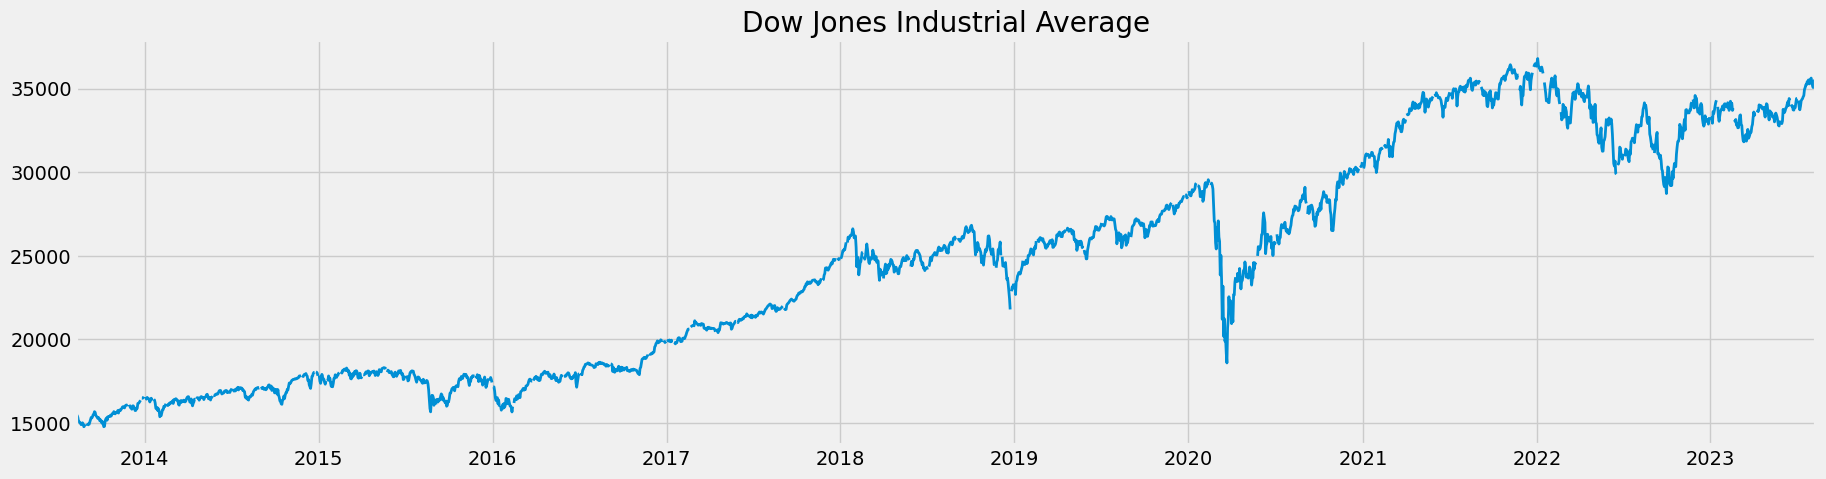

In [7]:
djia = fred.get_series(series_id = 'DJIA')
djia.plot(figsize=(20,5), title='Dow Jones Industrial Average', lw=2)

## Pull and Join Multiple Data Series

In [8]:
unemployment_results = fred.search('unemployment', order_by='popularity')
unemployment_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CPIAUCSL,CPIAUCSL,2023-08-13,2023-08-13,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2023-07-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2023-08-10 07:48:02-05:00,93,The Consumer Price Index for All Urban Consume...
UNRATE,UNRATE,2023-08-13,2023-08-13,Unemployment Rate,1948-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:45:03-05:00,92,The unemployment rate represents the number of...
PAYEMS,PAYEMS,2023-08-13,2023-08-13,"All Employees, Total Nonfarm",1939-01-01,2023-07-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-08-04 07:47:02-05:00,82,"All Employees: Total Nonfarm, commonly known a..."
ICSA,ICSA,2023-08-13,2023-08-13,Initial Claims,1967-01-07,2023-08-05,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-08-10 07:33:07-05:00,82,An initial claim is a claim filed by an unempl...
CES0500000003,CES0500000003,2023-08-13,2023-08-13,"Average Hourly Earnings of All Employees, Tota...",2006-03-01,2023-07-01,Monthly,M,Dollars per Hour,$ per Hour,Seasonally Adjusted,SA,2023-08-04 07:47:02-05:00,78,The series comes from the 'Current Employment ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SDJERA3URN,SDJERA3URN,2023-08-13,2023-08-13,"Unemployment Rate in Jerauld County, SD",1990-01-01,2023-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-08-02 10:16:50-05:00,3,These data come from the Current Population Su...
IDLEWI1URN,IDLEWI1URN,2023-08-13,2023-08-13,"Unemployment Rate in Lewis County, ID",1990-01-01,2023-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-08-02 10:27:05-05:00,3,These data come from the Current Population Su...
KSWASH1URN,KSWASH1URN,2023-08-13,2023-08-13,"Unemployment Rate in Washington County, KS",1990-01-01,2023-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-08-02 10:26:30-05:00,3,These data come from the Current Population Su...


<Axes: title={'center': 'Unemployment Rate'}>

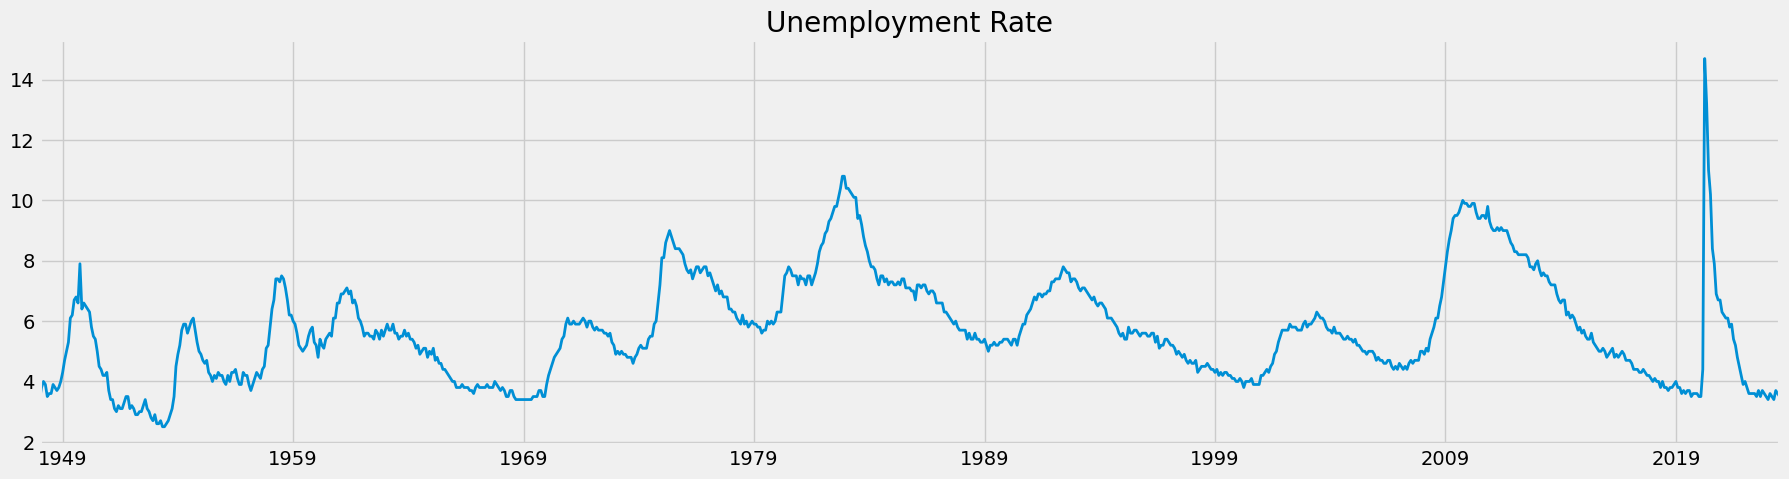

In [9]:
unrate = fred.get_series('UNRATE')
unrate.plot(figsize=(20,5), title='Unemployment Rate', lw=2)

In [10]:
unemployment_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemployment_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-08-13,2023-08-13,Unemployment Rate,1948-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:45:03-05:00,92,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-08-13,2023-08-13,Unemployment Rate,1948-01-01,2023-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-08-04 07:45:34-05:00,53,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-08-13,2023-08-13,Unemployment Rate - Black or African American,1972-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:45:23-05:00,66,The series comes from the 'Current Population ...
UNEMPLOY,UNEMPLOY,2023-08-13,2023-08-13,Unemployment Level,1948-01-01,2023-07-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-08-04 07:45:25-05:00,65,The series comes from the 'Current Population ...
LNU04000006,LNU04000006,2023-08-13,2023-08-13,Unemployment Rate - Black or African American,1972-01-01,2023-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-08-04 07:46:00-05:00,13,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNU04023557,LNU04023557,2023-08-13,2023-08-13,Unemployment Rate - Reentrants to Labor Force,1967-01-01,2023-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-08-04 07:47:17-05:00,2,The series comes from the 'Current Population ...
TNWILL0URN,TNWILL0URN,2023-08-13,2023-08-13,"Unemployment Rate in Williamson County, TN",1990-01-01,2023-06-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-08-02 10:12:03-05:00,2,These data come from the Current Population Su...
VABEDF5URN,VABEDF5URN,2023-08-13,2023-08-13,"Unemployment Rate in Bedford City, VA (DISCONT...",1990-01-01,2014-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2015-02-04 11:21:45-06:00,2,These data come from the Current Population Su...


In [11]:
unemployment_df = unemployment_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemployment_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-08-13,2023-08-13,Unemployment Rate,1948-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:45:03-05:00,92,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-08-13,2023-08-13,Unemployment Rate - Black or African American,1972-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:45:23-05:00,66,The series comes from the 'Current Population ...
U6RATE,U6RATE,2023-08-13,2023-08-13,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:45:30-05:00,62,The series comes from the 'Current Population ...
CAUR,CAUR,2023-08-13,2023-08-13,Unemployment Rate in California,1976-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-26 14:43:01-05:00,56,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-08-13,2023-08-13,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,47,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LBSSA44,LBSSA44,2023-08-13,2023-08-13,Labor Force Participation Rate for Rhode Island,1976-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-21 09:01:22-05:00,1,A state's labor-force participation rate is th...
LNS14023705,LNS14023705,2023-08-13,2023-08-13,Unemployment Rate - Job Leavers,1967-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:46:39-05:00,1,The series comes from the 'Current Population ...
LNS14000093,LNS14000093,2023-08-13,2023-08-13,Unemployment Rate - 45-54 Yrs.,1948-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:46:40-05:00,2,The series comes from the 'Current Population ...


In [12]:
# unemployment_df['title']
# unemployment_df['title'].str.contains('Unemployment Rate')
unemployment_df.loc[unemployment_df['title'].str.contains('Unemployment Rate')]

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-08-13,2023-08-13,Unemployment Rate,1948-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:45:03-05:00,92,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-08-13,2023-08-13,Unemployment Rate - Black or African American,1972-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:45:23-05:00,66,The series comes from the 'Current Population ...
CAUR,CAUR,2023-08-13,2023-08-13,Unemployment Rate in California,1976-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-26 14:43:01-05:00,56,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-08-13,2023-08-13,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,47,Series Is Presented Here As Three Variables--(...
M0892BUSM156SNBR,M0892BUSM156SNBR,2023-08-13,2023-08-13,Unemployment Rate for United States,1940-01-01,1946-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:29:19-05:00,10,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CWSTUR,CWSTUR,2023-08-13,2023-08-13,Unemployment Rate in West Census Region,1976-01-01,2023-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-07-26 14:42:21-05:00,3,None
LNS14023705,LNS14023705,2023-08-13,2023-08-13,Unemployment Rate - Job Leavers,1967-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:46:39-05:00,1,The series comes from the 'Current Population ...
LNS14000093,LNS14000093,2023-08-13,2023-08-13,Unemployment Rate - 45-54 Yrs.,1948-01-01,2023-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-08-04 07:46:40-05:00,2,The series comes from the 'Current Population ...


In [13]:
unemployment_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemployment_df = unemployment_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemployment_df = unemployment_df.loc[unemployment_df['title'].str.contains('Unemployment Rate')]

In [14]:
unemployment_df.index       # list based off search, query, and filter above

Index(['UNRATE', 'LNS14000006', 'CAUR', 'M0892AUSM156SNBR', 'M0892BUSM156SNBR',
       'FLUR', 'TXUR', 'LNS14000031', 'U2RATE', 'LNS14000024', 'NYUR',
       'LNS14000002', 'LNS14000009', 'LNS14024887', 'MAUR', 'MIUR', 'OHUR',
       'PAUR', 'ILUR', 'ALUR', 'LNS14000003', 'WIUR', 'NCUR', 'LNS14027660',
       'LRUN64TTUSM156S', 'COUR', 'NJUR', 'KYUR', 'TNUR', 'LNS14000001',
       'UTUR', 'VAUR', 'MNUR', 'ARUR', 'MOUR', 'WVUR', 'AZUR', 'LNS14032183',
       'ORUR', 'GAUR', 'SCUR', 'MDUR', 'WAUR', 'LNS14027662', 'INUR', 'AKUR',
       'IAUR', 'CTUR', 'LASMT261982000000003', 'LNS14000018', 'OKUR', 'NVUR',
       'LNS14000060', 'LAUR', 'LNS14000012', 'MTUR', 'LNS14000036', 'NMUR',
       'NDUR', 'NEUR', 'PRUR', 'LNS14027659', 'HIUR', 'DEUR', 'DCUR', 'MSUR',
       'SDUR', 'LNS14000028', 'KSUR', 'IDUR', 'RIUR', 'LASMT391746000000003',
       'WYUR', 'LNS14000032', 'NHUR', 'MEUR', 'LRHUTTTTUSM156S', 'VTUR',
       'USAURAMS', 'LNS14024230', 'CMWRUR', 'LNS14027689', 'LNS14000026',
       'LR

In [15]:
#unemployment_df.index.sort_values(key=len)
#unemployment_df.index.sort_values()    # works

In [16]:
# Example of looping through "unemployment_df.index"
# Only looks at 1st item of list
for myid in unemployment_df.index:
    results = fred.get_series(myid)
    break

In [17]:
print(results)
results.to_frame(name=myid)

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-03-01    3.5
2023-04-01    3.4
2023-05-01    3.7
2023-06-01    3.6
2023-07-01    3.5
Length: 907, dtype: float64


,UNRATE
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2023-03-01,3.5
2023-04-01,3.4
2023-05-01,3.7
2023-06-01,3.6


In [18]:
# Looping through all items from list
all_results = []

for myid in unemployment_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

# Dropping id not related to unemployment rates of states
unemployment_results = pd.concat(all_results, axis=1).drop(['UNRATE', 'LNS14000006', 'M0892AUSM156SNBR', 'M0892BUSM156SNBR', 'LNS14000031', 'U2RATE', 
       'LNS14000024', 'LNS14000002', 'LNS14000009', 'LNS14024887', 'LNS14000003', 'LNS14027660', 'LRUN64TTUSM156S', 'LNS14000001',
       'LNS14032183', 'LNS14027662', 'LASMT261982000000003', 'LNS14000018', 'LNS14000060', 'LNS14000012', 'LNS14000036', 'LNS14027659', 
       'LNS14000028', 'LASMT391746000000003', 'LNS14000032', 'LRHUTTTTUSM156S', 'USAURAMS', 'LNS14024230', 'CMWRUR', 'LNS14027689', 'LNS14000026',
       'LRUN24TTUSM156S', 'CNERUR', 'LNS14000315', 'LNS14000025', 'CSOUUR', 'LNS14000089', 'LRUNTTTTUSM156S', 'LNS14000048', 'CNEWUR',
       'LNS14000029', 'CWSTUR', 'LNS14023705', 'LNS14000093', 'LNS14200000', 'LNS14000150'], axis=1)

print(type(all_results))
print(len(all_results))

<class 'list'>
98


In [19]:
all_results[3]      # Example

,M0892AUSM156SNBR
1929-04-01,0.69
1929-05-01,1.65
1929-06-01,2.06
1929-07-01,0.79
1929-08-01,0.04
...,...
1942-02-01,3.56
1942-03-01,3.22
1942-04-01,2.33
1942-05-01,1.22


In [20]:
pd.concat(all_results, axis=1)      # take all the items from list and combine them

,UNRATE,LNS14000006,CAUR,M0892AUSM156SNBR,M0892BUSM156SNBR,FLUR,TXUR,LNS14000031,U2RATE,LNS14000024,NYUR,LNS14000002,LNS14000009,LNS14024887,MAUR,MIUR,OHUR,PAUR,ILUR,ALUR,LNS14000003,WIUR,NCUR,LNS14027660,LRUN64TTUSM156S,COUR,NJUR,KYUR,TNUR,LNS14000001,UTUR,VAUR,MNUR,ARUR,MOUR,WVUR,AZUR,LNS14032183,ORUR,GAUR,SCUR,MDUR,WAUR,LNS14027662,INUR,AKUR,IAUR,CTUR,LASMT261982000000003,LNS14000018,OKUR,NVUR,LNS14000060,LAUR,LNS14000012,MTUR,LNS14000036,NMUR,NDUR,NEUR,PRUR,LNS14027659,HIUR,DEUR,DCUR,MSUR,SDUR,LNS14000028,KSUR,IDUR,RIUR,LASMT391746000000003,WYUR,LNS14000032,NHUR,MEUR,LRHUTTTTUSM156S,VTUR,USAURAMS,LNS14024230,CMWRUR,LNS14027689,LNS14000026,LRUN24TTUSM156S,CNERUR,LNS14000315,LNS14000025,CSOUUR,LNS14000089,LRUNTTTTUSM156S,LNS14000048,CNEWUR,LNS14000029,CWSTUR,LNS14023705,LNS14000093,LNS14200000,LNS14000150
1929-04-01,NaN,NaN,NaN,0.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,1.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,2.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,0.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,3.5,5.0,4.4,NaN,NaN,2.6,4.0,5.2,1.8,3.2,4.1,3.4,4.6,7.5,3.5,4.1,3.8,4.2,4.4,2.3,3.2,2.5,3.5,4.0,3.613849,2.8,3.5,3.8,3.4,3.6,2.4,3.2,2.8,3.0,2.5,3.4,3.5,2.8,4.4,3.1,3.2,2.7,4.5,2.0,3.1,3.7,2.8,3.9,3.5,14.5,3.0,5.5,2.9,3.6,9.8,2.3,6.5,3.5,2.1,2.1,6.0,4.8,3.5,4.4,4.8,3.5,1.9,3.0,2.9,2.6,3.1,4.0,3.7,4.2,2.4,2.6,3.5,2.7,NaN,2.6,3.4,3.0,3.1,7.5,3.8,2.0,3.4,3.3,3.8,3.5,2.9,3.4,3.0,4.0,0.5,2.4,3.9,1.9
2023-04-01,3.4,4.7,4.5,NaN,NaN,2.6,4.0,4.5,1.6,3.2,4.0,3.3,4.4,6.5,3.1,3.8,3.7,4.1,4.2,2.2,3.1,2.4,3.4,3.9,3.450059,2.8,3.5,3.7,3.3,3.5,2.3,3.1,2.8,2.8,2.5,3.3,3.4,2.8,4.0,3.1,3.1,2.5,4.3,1.9,3.0,3.7,2.7,3.8,3.2,12.9,2.9,5.4,3.1,3.6,9.2,2.3,5.4,3.5,2.1,2.0,6.0,5.4,3.3,4.3,5.0,3.4,1.9,2.9,2.9,2.6,3.0,3.9,3.5,4.4,2.1,2.4,3.4,2.4,NaN,2.3,3.3,2.9,3.1,6.5,3.7

In [21]:
all_unemployment_states = unemployment_results.dropna()       # Drops values with N/A

In [ ]:
print(all_unemployment_states.isna().sum(axis=1))        # show missing (N/A) values for each date
# all_unemployment_states.isna().sum(axis=1).plot()        # data visual with plot

In [24]:
all_unemployment_states     # dataframe after removing N/A values

,CAUR,FLUR,TXUR,NYUR,MAUR,MIUR,OHUR,PAUR,ILUR,ALUR,WIUR,NCUR,COUR,NJUR,KYUR,TNUR,UTUR,VAUR,MNUR,ARUR,MOUR,WVUR,AZUR,ORUR,GAUR,SCUR,MDUR,WAUR,INUR,AKUR,IAUR,CTUR,OKUR,NVUR,LAUR,MTUR,NMUR,NDUR,NEUR,PRUR,HIUR,DEUR,DCUR,MSUR,SDUR,KSUR,IDUR,RIUR,WYUR,NHUR,MEUR,VTUR
1976-01-01,9.2,9.7,5.8,10.3,10.5,9.9,8.1,8.0,6.6,6.6,5.8,6.4,5.8,10.3,5.6,6.0,5.8,6.1,6.0,7.3,5.9,7.5,10.2,9.5,8.4,7.4,6.4,8.5,6.6,7.1,4.3,9.8,5.8,9.2,6.3,5.8,8.6,3.4,3.3,19.6,9.8,8.0,8.7,6.7,3.3,4.2,5.6,7.8,4.1,6.5,8.7,8.6
1976-02-01,9.2,9.7,5.8,10.3,10.5,9.9,8.1,8.1,6.6,6.6,5.8,6.4,5.7,10.3,5.6,6.0,5.9,6.1,6.0,7.3,5.9,7.5,10.2,9.5,8.4,7.4,6.4,8.5,6.6,7.1,4.3,9.8,5.8,9.2,6.3,5.8,8.7,3.4,3.3,19.5,9.8,8.0,8.7,6.7,3.3,4.2,5.6,7.8,4.1,6.5,8.7,8.6
1976-03-01,9.1,9.6,5.9,10.2,10.5,9.9,8.1,8.1,6.6,6.6,5.7,6.4,5.7,10.3,5.6,6.0,5.8,6.1,5.9,7.3,5.9,7.5,10.1,9.4,8.4,7.3,6.4,8.4,6.5,7.0,4.3,9.8,5.8,9.2,6.3,5.8,8.7,3.4,3.3,19.3,9.8,8.0,8.6,6.6,3.2,4.2,5.6,7.7,4.1,6.5,8.6,8.6
1976-04-01,9.1,9.5,5.9,10.2,10.3,9.8,8.0,8.1,6.6,6.5,5.6,6.3,5.6,10.3,5.6,6.0,5.8,6.0,5.8,7.2,6.0,7.5,10.0,9.2,8.3,7.2,6.4,8.5,6.3,6.9,4.2,9.6,5.8,9.0,6.4,5.8,8.6,3.5,3.2,19.0,9.7,8.1,8.5,6.4,3.1,4.2,5.6,7.7,4.0,6.5,8.6,8.6
1976-05-01,9.0,9.3,5.9,10.1,10.1,9.6,7.8,8.1,6.6,6.4,5.5,6.1,5.6,10.3,5.5,5.9,5.7,5.9,5.7,7.1,6.0,7.4,9.8,9.1,8.1,7.0,6.5,8.5,6.0,6.9,4.1,9.4,5.7,8.9,6.5,5.8,8.6,3.6,3.1,18.9,9.4,8.3,8.4,6.3,3.1,4.2,5.6,7.7,3.9,6.5,8.5,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-01,4.4,2.6,4.0,4.2,3.7,4.3,3.9,4.4,4.5,2.5,2.7,3.6,2.9,3.5,3.9,3.5,2.4,3.2,3.0,3.2,2.6,3.7,3.7,4.7,3.1,3.2,2.9,4.6,3.1,3.8,2.9,4.0,3.0,5.5,3.6,2.4,3.6,2.1,2.3,6.0,3.6,4.6,4.7,3.7,2.1,2.9,2.6,3.1,3.8,2.7,2.8,2.8
2023-03-01,4.4,2.6,4.0,4.1,3.5,4.1,3.8,4.2,4.4,2.3,2.5,3.5,2.8,3.5,3.8,3.4,2.4,3.2,2.8,3.0,2.5,3.4,3.5,4.4,3.1,3.2,2.7,4.5,3.1,3.7,2.8,3.9,3.0,5.5,3.6,2.3,3.5,2.1,2.1,6.0,3.5,4.4,4.8,3.5,1.9,2.9,2.6,3.1,3.7,2.4,2.6,2.7
2023-04-01,4.5,2.6,4.0,4.0,3.1,3.8,3.7,4.1,4.2,2.2,2.4,3.4,2.8,3.5,3.7,3.3,2.3,3.1,2.8,2.8,2.5,3.3,3.4,4.0,3.1,3.1,2.5,4.3,3.0,3.7,2.7,3.8,2.9,5.4,3.6,2.3,3.5,2.1,2.0,6.0,3.3,4.3,5.0,3.4,1.9,2.9,2.6,3.0,3.5,2.1,2.4,2.4
2023-05-01,4.5,2.6,4.1,3.9,2.8,3.7,3.6,4.0,4.1,2.2,2.4,3.4,2.8,3.6,3.8,3.3,2.3,2.9,2.9,2.7,2.5,3.3,3.4,3.7,3.2,3.1,2.4,4.1,3.1,3.6,2.7,3.7,2.8,5.4,3.6,2.3,3.5,2.1,1.9,6.1,3.1,4.2,5.1,3.2,1.9,2.9,2.6,3.0,3.3,1.9,2.4,2.1


In [ ]:
px.line(all_unemployment_states)